<a href="https://colab.research.google.com/github/idai2/LabProj_2022_SudiamoTogether/blob/main/idaa3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3037459586406298514
 xla_global_id: -1]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/idaproject

/content/drive/MyDrive/idaproject


BRAIN tumor *segmentation*

Multi sclerosids disease

In [ ]:
# Let's load some other packages we need
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nibabel as nib # common way of importing nibabel

In [ ]:
mri_file = 'smask_ref.nii'
img = nib.load(mri_file)
mrii_file = 'FLAIR.nii'
img1 = nib.load(mrii_file)

In [ ]:
print(type(img))

<class 'nibabel.nifti1.Nifti1Image'>


In [ ]:
print(img.shape)

(181, 217, 181)


In [ ]:
img_data = img.get_fdata()
print(type(img_data))  # it's a numpy array!
print(img_data.shape)
img1_data = img1.get_fdata()
print(img1_data.shape)


<class 'numpy.memmap'>
(181, 217, 181)
(181, 217, 181)


In [ ]:
mid_slice_x = img_data[: ,:, 90]
print(mid_slice_x.shape)

(181, 217)


In [ ]:
# Note that the transpose the slice (using the .T attribute).
# This is because imshow plots the first dimension on the y-axis and the
# second on the x-axis, but we'd like to plot the first on the x-axis and the
# second on the y-axis. Also, the origin to "lower", as the data was saved in
# "cartesian" coordinates.
#plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
#plt.xlabel('First axis')
#plt.ylabel('Second axis')
#plt.colorbar(label='Signal intensity')
#plt.show()
#plt.imsave('smask_ref90.jpg', mid_slice_x.T, cmap= 'gray', origin='lower')
gm_array=img1_data[img_data==2]
#gm_array = np.where(img_data==2.0)
#thr_img=(img_data>3)
#print('thr_img', thr_img)
print('gm_array', gm_array)
#plt.imshow(thresh_img, cmap='gray')

gm_array [28496.20117188 24637.03320312 30497.71875    ... 15178.08691406
  8334.09765625  5097.46630859]


[  0 691   0   0]


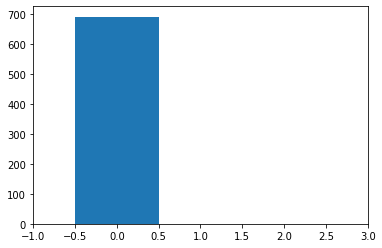

In [ ]:
import numpy as np
import skimage.color
import skimage.io
import matplotlib.pyplot as plt
import cv2

from skimage import color
from skimage import io
#img = color.rgb2gray(io.imread('smask_ref90.jpg'))
hist, bin_edges = np.histogram(gm_array, bins=[-1, 0, 1,2,3])
print(hist)
import matplotlib.pyplot as plt
plt.bar(bin_edges[:-1], hist, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.show() 
#ret, binary_mask = cv2.threshold(img1, 0.8, 255, cv2.THRESH_BINARY)
#fig, ax = plt.subplots()
#plt.imshow(binary_mask, cmap="gray")
#plt.show()
#plt.imsave('binarysmask_ref90.jpg', binary_mask, cmap='gray')

In [ ]:
binary_mask = (img_data==3).astype(np.uint8)
print(binary_mask)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
final_gm_array = binary_mask*img1_data
#plt.imshow(final_gm_array, cmap='gray')

[      0 6641747       0       0]


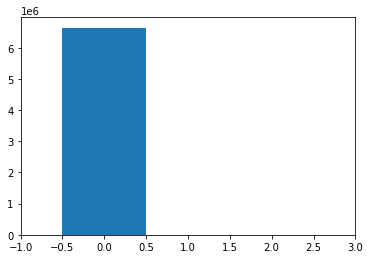

In [ ]:
import numpy as np
import skimage.color
import skimage.io
import matplotlib.pyplot as plt
import cv2

from skimage import color
from skimage import io
#img = color.rgb2gray(io.imread('smask_ref90.jpg'))
hist, bin_edges = np.histogram(final_gm_array, bins=[-1, 0, 1,2,3])
print(hist)
import matplotlib.pyplot as plt
plt.bar(bin_edges[:-1], hist, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.show() 
#ret, binary_mask = cv2.threshold(img1, 0.8, 255, cv2.THRESH_BINARY)
#fig, ax = plt.subplots()
#plt.imshow(binary_mask, cmap="gray")
#plt.show()
#plt.imsave('binarysmask_ref90.jpg', binary_mask, cmap='gray')

y [6641747.       0.]
x [0.  0.5 1. ]
Average of the list = 0.5
max_y 6641747.0
min_x 0
max_x 0
fwhm 0.0


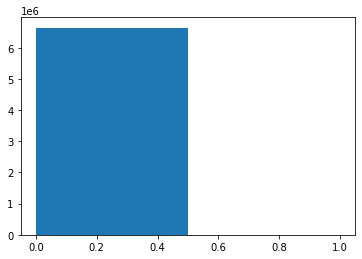

thresh 0.5


In [ ]:
import numpy as np
import skimage.color
import skimage.io
import matplotlib.pyplot as plt
import cv2
from skimage import color
from skimage import io
from scipy.interpolate import splrep, sproot, splev
from matplotlib import pyplot as mp
import numpy as np

#img = color.rgb2gray(io.imread('finalFLAIR_ref90.jpg'))
(y, x, patches) = plt.hist(final_gm_array.ravel(), bins=[0,0.5,1], range=(0, 1))
print ("y" , y)
print ("x", x)
half_max = max(y) / 2.
######################
########find mean value of x
def Average(x):
    return sum(x) / len(x)
  
# Driver Code
average = Average(x)
  
# Printing average of the list
print("Average of the list =", round(average, 2))
####################calculation of fwhm
max_y = max(y)  # Find the maximum y value
print ("max_y", max_y)
max_y = max(y)  # Find the maximum y value
xs = [x for x in range(0,1) if y[x] > max_y/2.0]
min_x = min(xs) # Print the points at half-maximum
print("min_x", min_x)
max_x = max(xs)
print("max_x", max_x)
fwhm = (max_x - min_x)/255.0
print("fwhm", fwhm)
#######################


import cv2
#ret, binary_mask = cv2.threshold(img, 0.7, 255, cv2.THRESH_BINARY)
#fig, ax = plt.subplots()
#plt.imshow(binary_mask, cmap="gray")
plt.show()
#plt.imsave('lesionmask_ref90.jpg', binary_mask, cmap='gray')
import numpy as np
import scipy.optimize as opt

import numpy as np
import scipy.optimize as opt


c = 2
standard_deviation = fwhm/2.35
thresh = average + c*standard_deviation
print ("thresh",thresh)
ret , lesion = cv2.threshold(final_gm_array, thresh, 255, cv2.THRESH_BINARY)
#plt.imshow(lesion, cmap="gray")
#plt.imsave('lesion.jpg', binary_mask, cmap='gray')

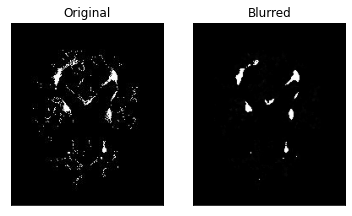

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('lesionmask_ref90.jpg')
median = cv2.medianBlur(img,3)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()
plt.imsave('median3onlesion.jpg', median, cmap='gray')